### Accidentes automovilísticos 

#### Los datos para este problema se basa en la información obtenida de The Wall Street Journal. 

##### Sea x la cantidad en años de los conductores con licencia de conducir
##### Sea y el porcentaje de accidentes fatales a una edad dada

In [10]:
accidentes = {'x': (17, 27, 37, 47, 57, 67, 77),
              'y' : (36,25,20,12,10,7,5)}

In [11]:
#Importamos nuestros datos

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
#Leemos nuestro data frame

accidentes = pd.DataFrame(accidentes)

In [13]:
#Cabezal de los datos 

accidentes.head()

,x,y
0,17,36
1,27,25
2,37,20
3,47,12
4,57,10


Problema a solucionar: Predecir el porcentaje de todos los accidentes fatales debido al exceso de velocidad para jóvenes de 25 años.

In [15]:
#Obteniendo correlación de pearson 

accidentes.corr(method = 'pearson')

,x,y
x,1.000000,-0.959374
y,-0.959374,1.000000


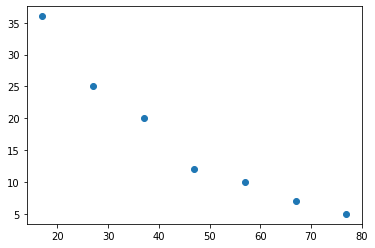

In [16]:
plt.scatter(x = 'x', y = 'y', data = accidentes)

Se puede observar una correlación fuerte negativa.
A mayor edad, menos cantidad de accidentes fatales se registran.

In [19]:
#Comenzamos a aplicar la regresión lineal 

suma_x = sum(accidentes['x']) #suma de x
suma_y = sum(accidentes['y']) #suma de y
x2 = sum(accidentes['x']**2) #x al cuadrado
y2 = sum(accidentes['y']**2) #y al cuadrado
xy = sum(accidentes['x']*accidentes['y']) #suma de x*y
media_x = np.mean(accidentes['x']) #promedio de x
media_y = np.mean(accidentes['y']) #promedio de y

In [20]:
#Resultados obtenidos

suma_x, suma_y, x2, y2, xy, media_x, media_y

(329, 115, 18263, 2639, 4015, 47.0, 16.428571428571427)

Ahora, teniendo todos los datos anteriores vamos a calcular el criterio de mínimos cuadrados.
Para saber esto, necesitamos obtener los valores de y, a, b y x 
a es el intercepto
b es la pendiente

y = a + bx

In [23]:
n1 = len(accidentes)*xy-(suma_x*suma_y)

In [25]:
n2 = len(accidentes)*x2-(suma_x**2)

In [30]:
#Calculamos la pendiente

b = n1/n2

In [31]:
print("El valor de la pendiente es: ",b)

El valor de la pendiente es:  -0.49642857142857144


In [32]:
#Calculamos el intercepto

a = media_y - (b*media_x)

In [33]:
print("El valor del intercepto es: ",a)

El valor del intercepto es:  39.760714285714286


In [34]:
#Calculando y que es el porcentaje de accidentes de jóvenes de 25 años 

y = a + (b*25)

In [35]:
print("El porcentaje de accidentes en jovenes de 25 años es de: ", y)

El porcentaje de accidentes en jovenes de 25 años es de:  27.35


In [37]:
slope, intercept, r_value, p_value, std_err = stats.linregress(accidentes['x'], accidentes['y'])

In [46]:
print(p_value)
print(r_value)

0.0006250993492627182
-0.9593738827752294


Tenemos un p_value por debajo de 0.05 por lo que aceptamos la regresión 

In [39]:
r2 = r_value**2

In [40]:
r2

0.9203982469512196

Tenemos un 92% que explica la regresión negativa que tienen las variables 

In [41]:
std_err

0.06528977792917365

Tenemos un error de predicción del 6%, relativamente muy bajo. 

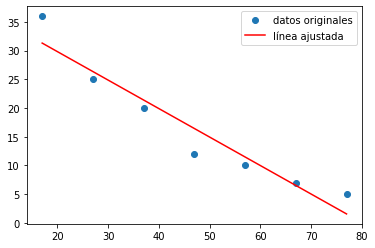

In [45]:
#Obtenemos la regresión 

plt.plot(accidentes['x'], accidentes['y'], 'o', label='datos originales')
plt.plot(accidentes['x'], a + b*accidentes['x'], 'r', label='línea ajustada')
plt.legend()
plt.show()